# Code and Physical Units

## GRMHD Units in terms of EOS 

$\newcommand{\rhoCode}{{\tilde{\rho}}}$
$\newcommand{\MCode}{{\tilde{M}}}$ $\newcommand{\rCode}{{\tilde{r}}}$ $\newcommand{\PCode}{{\tilde{P}}}$$\newcommand{\tCode}{{\tilde{t}}}$$\newcommand{\Mfid}{{M_{\rm fid}}}$$\newcommand{\MfidBar}{\bar{M}_{\rm fid}}$$\newcommand{\Mbar}{\bar{M}}$
$\newcommand{\rBar}{\bar{r}}$$\newcommand{\tBar}{\bar{t}}$
In GRMHD, we can set an equation of state of the form
\begin{equation}
P = K\rho^{1+1/n}
\end{equation}
Taking $c_s^2 = \partial P/\partial \rho = (1+1/n) K\rho^{1/n}$.  This gives for some fidicial $\rho_0$
\begin{equation}
c_{s,0}^2 = \left(1 + \frac 1 n\right)K\rho_0^{1/n}.
\end{equation}
Selecting $c_s^2 = c^2\left(1 + 1/n\right)$, we have
\begin{equation}
\rho_0 = \left(\frac {c^2}{K}\right)^n
\end{equation}
This is equivalent to setting the isothermal sound speed to $c$.  With this definition of $\rho_0$, we can write
\begin{equation}
P = \rho_0c^2\left(\frac{\rho}{\rho_0}\right)^{1+1/n}
\end{equation}
which allows us to define the dimensionless density $\rhoCode = \rho/\rho_0$ and dimensionless pressure $\PCode = P/\rho_0 c^2$
\begin{equation}
\PCode = \rhoCode^{1+1/n},
\end{equation}
where we adopt code units where $c=1$.  These dimensionless pressure and density are in $G=c=1$ units and can be used in GRMHD code including inclusion in the spacetime solver via $T_{\mu\nu}$.  Note that this sets $K=1$ in these units.

To find a dimensionless mass, $\MCode$, dimensionless distance, $\rCode$, and dimensionless time, $\tCode$, we note
$GM/rc^2$ is dimensionless
\begin{equation}
\frac{GM}{rc^2} = \frac{G\rho_0 r^2}{c^2} = \frac{Gc^{2n-2}}{K^n}r^2 \rightarrow \rCode = \frac{\sqrt{G}c^{n-1}}{K^{n/2}} r = \frac r {r_0},
\end{equation}
where $r_0 = K^{n/2}/\sqrt{G}c^{n-1}$.  Then
\begin{eqnarray}
\tCode &=& \frac{t}{t_0} = \frac{t}{r_0/c} = \frac{\sqrt{G}c^n}{K^{n/2}} t \\
\MCode &=& \frac{M}{M_0} = \frac{M}{\rho_0 r_0^3} = M\frac{K^n}{c^{2n}}\frac{G^{3/2}c^{3(n-1)}}{K^{3n/2}} = \frac{G^{3/2}c^{n-3}}{K^{n/2}} M,
\end{eqnarray}
Hence, we have 
\begin{eqnarray}
\rho_0 &=& \left(\frac{K}{c^2}\right)^n\\
r_0 &=& \frac{c^{n+1}}{\sqrt{G}K^{n/2}}\\
t_0 &=& \frac{c^{n}}{\sqrt{G}K^{n/2}}\\
M_0 &=& \frac{c^{n+3}}{G^{3/2}K^{n/2}}
\end{eqnarray}

## Mapping to SENR or any NR code

So we will need a $\Mfid$ which is define such that the (SENR) code units $\MfidBar = 1$ or in other words in SENR codes units: 
\begin{equation}
\Mbar = \frac{M}{\Mfid}
\end{equation}
In these units:
\begin{eqnarray}
\rBar &=& \frac{c^2}{G\Mfid} r\\
\tBar &=& \frac{c^3}{G\Mfid} t
\end{eqnarray}
At some level $\Mfid$ is arbitrary, so we can select $M_0 = \Mfid$.  In this case, this means that $\rBar = \rCode$, $\tBar = \tCode$, and $\Mbar = \MCode$, which fixes all the quantities. This comes at a cost the $\bar{M}_{\rm ADM}$ is not something nice like 1 or 2, but the choice is consistent.

### Zach's comments:

Sound speed $c_s$ is defined as

$$\frac{\partial P}{\partial \rho} = c_s^2,$$

so if we have a polytropic EOS, where

$$P = K \rho^{(1 + 1/n)},$$

then

\begin{align}
\frac{\partial P}{\partial \rho} &= c_s^2 \\
&= \left(1 + \frac{1}{n}\right) K \rho^{1/n}.
\end{align}

Let's adopt the notation 

$$[\rho] = \text{"the units of $\rho$"}$$

Using this notation and the fact that $n$ is dimensionless, the above expression implies

\begin{align}
\left[\rho^{1/n}\right] &= \left[\frac{c_s^2}{K}\right] \\
\implies \left[\rho\right] &= \left[\frac{c_s^2}{K}\right]^n
\end{align}

I think you found the inverse to be true.

# TOV Solver as illustration
The TOV equations are 
\begin{eqnarray}
\frac{dP}{dr} &=& -\rho\frac{GM}{r^2}\left(1 + \frac P {\rho c^2}\right)\left(1 + \frac {4\pi r^3 P}{Mc^2}\right)\left(1 - \frac {2GM}{rc^2}\right)^{-1}\\
\frac{dM}{dr} &=& 4\pi \rho r^2,
\end{eqnarray}
Here $M$ is the mass measure by a distant observer when we take $r\rightarrow \infty$.  Note this is different from the mass measured by integrating the density over the volume
\begin{equation}
M' = \int_0^{\infty} \frac{4\pi r^2\rho}{\sqrt{1 - \frac {2 GM}{rc^2}}} dr
\end{equation}

In dimensionless units they are 
\begin{eqnarray}
\frac{d\PCode}{d\rCode} &=& -\rhoCode\frac{\MCode}{\rCode^2}\left(1 + \frac {\PCode}{\rhoCode}\right)\left(1 + \frac {4\pi \rCode^3 \PCode}{\MCode}\right)\left(1 - \frac {2\MCode}{\rCode}\right)^{-1}\\
\frac{d\MCode}{d\rCode} &=& 4\pi \rhoCode\rCode^2
\end{eqnarray}
We can simplify this using $\PCode = \rhoCode^{1+1/n}$
\begin{eqnarray}
\frac{d\rhoCode}{d\rCode} &=& -\frac{\rhoCode\left(1 + \rhoCode^{1/n}\right)\left(\MCode + 4\pi \rCode^3 \rhoCode^{1+1/n}\right)}{\rCode^2\left(1 + \frac 1 n\right)\rhoCode^{1/n}\left(1 - \frac {2\MCode}{\rCode}\right)}\\
\frac{d\MCode}{d\rCode} &=& 4\pi \rhoCode\rCode^2
\end{eqnarray}
This equation is easy to numerically integrate, but we have to be careful near $r=0$.  Here we have the approximate integral
\begin{eqnarray}
\frac{d\rhoCode}{d\rCode} &=& -\frac{\rhoCode_c\left(1 + \rhoCode_c^{1/n}\right)\left(4\pi\rhoCode_c\rCode/3 + 4\pi \rCode \rhoCode_c^{1+1/n}\right)}{\left(1 + \frac 1 n\right)\rhoCode^{1/n}\left(1 - \frac {8\pi\rhoCode_c\rCode^2}{3}\right)}
\end{eqnarray}


## Another dimensionless prescription

Let consider an alternative formulation where rather than setting $K=1$, we set the characteristic mass $\Mfid = M_0$.  In this case,
\begin{eqnarray}
r_0 &=& \frac{GM_0}{c^2} \\
t_0 &=& \frac{GM_0}{c^3} \\
\rho_0 &=& \frac{M_0}{r_0^3} = \frac{c^6}{G^3 M_0^2} = 6.17\times 10^{17}\left(\frac {M_0} {1 M_{\odot}}\right)^{-2}
\end{eqnarray}
In this case we can define $\rhoCode = \rho/\rho_0$, $\rCode = r/r_0$, $t_0 = t/t_0$. The only remaining thing to do is to define $\PCode$.  Lets define 
\begin{equation}
P = P_0'\rhoCode^{1+1/n} \rightarrow P_0' = K\rho_0^{1+1/n},
\end{equation}
So defining $P_0 = \rho_0 c^2$, we have
\begin{equation}
\PCode = \frac{P}{P_0} = \frac{K\rho_0^{1/n}}{c^2}\rhoCode^{1+1/n} = \PCode_0\rhoCode^{1+1/n}
\end{equation}
If we take $K=1$ and define $\rho_0$ such that the $\PCode_0 = 1$, we recover the results above.

For this case, the dimensionless TOV equations are
\begin{eqnarray}
\frac{d\PCode}{d\rCode} &=& -\rhoCode\frac{\MCode}{\rCode^2}\left(1 + \frac {\PCode}{\rhoCode}\right)\left(1 + \frac {4\pi \rCode^3 \PCode}{\MCode}\right)\left(1 - \frac {2\MCode}{\rCode}\right)^{-1}\\
\frac{d\MCode}{d\rCode} &=& 4\pi \rhoCode\rCode^2
\end{eqnarray}
Which adopting $\PCode = \PCode_0\rhoCode^{1+1/n}$ gives
\begin{equation}
\frac{d\rhoCode}{d\rCode} = \frac{-\rhoCode
\left(1 + \PCode_0\rhoCode^{1/n}\right)
\left(\MCode + {4\pi \rCode^3 \PCode_0\rhoCode^{1+1/n}}\right)}{\left(1 - \frac {2\MCode}{\rCode}\right)\left(1 + \frac 1 n\right)\PCode_0\rhoCode^{1/n}\rCode^2}
\end{equation}
Again near $\rCode \ll 1$, we take the approximation
\begin{equation}
\frac{d\rhoCode}{d\rCode} = \frac{-\rhoCode_c
\left(1 + \PCode_0\rhoCode_c^{1/n}\right)
\left(4\pi\rhoCode_c\rCode/3 + {4\pi \rCode \PCode_0\rhoCode_c^{1+1/n}}\right)}{\left(1 - \frac{8\pi\rhoCode\rCode^2}{3}\right)\left(1 + \frac 1 n\right)\PCode_0\rhoCode_c^{1/n}}
\end{equation}

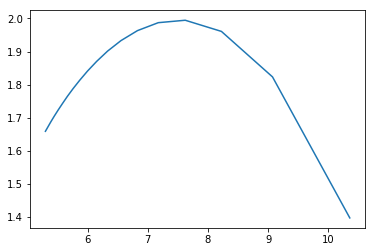

In [1]:
import numpy as np
import scipy.integrate as si
import math
import matplotlib.pyplot as pl
n = 1
P0 = 100.
gamma = 1 + 1./n
gam1 = gamma - 1
def rhs(r, y) :
# In \tilde units
#
    rho = y[0]
    m = y[1]
    if( r < 1e-4 or m <= 0.) : 
        drhodr = -rho*(1 + P0*rho**gam1)*(4.*math.pi*rho*r/3. + 4*math.pi*r*P0*rho**gamma)/(gamma*(1.-8*math.pi*rho*r*r/3.))/(P0*rho**gam1)
    else :
        drhodr = -rho*(1 + P0*rho**gam1)*(m + 4.*math.pi*r**3*P0*rho**gamma)/(r*r*gamma*(1-2.*m/r))/(P0*rho**gam1)
    
    dmdr = 4.*math.pi*r*r*rho
    
    return [drhodr, dmdr]

def integrateStar( rho0, showPlot = False) :
    integrator = si.ode(rhs).set_integrator('dop853')
    y0 = [rho0, 0.]
    integrator.set_initial_value(y0,0.)
    dr = 1e-5
    rho = y0[0]

    rhoArr = []
    rArr = []
    mArr = []

    r = 0.

    while integrator.successful() and rho > 1e-3*y0[0] : 
        rho, m = integrator.integrate(r + dr)
        r = integrator.t

        #print(r, rho, m/r, rhs(r,[rho,m]) )
        drhodr, dmdr = rhs( r+dr, [rho,m])
        dr = 0.1*min(abs(rho/drhodr), abs(m/dmdr))
        dr = min(dr, 1e-2)
        rhoArr.append(rho)
        rArr.append(r)
        mArr.append(m)

    if( showPlot) :
        pl.semilogy(rArr, rhoArr)
        pl.show()
        
    return rArr[-1], mArr[-1]

mass = []
radius = []

#integrateStar(0.001, True)
for rho0 in np.arange(0.001, 0.02, 0.001):
    r,m = integrateStar( rho0)
    mass.append(m)
    radius.append(r)
    
#print(mass, radius)
pl.clf()
pl.plot(radius,mass)
pl.show()


## metric for ToV equation

The metric for the TOV equation (taken) from wikipedia is
\begin{equation}
ds^2 = c^2 \exp(\nu) dt^2 - \left(1 - \frac{2GM}{rc^2}\right)^{-1} dr^2 + r^2 d\Omega^2
\end{equation}
where $M$ is defined as above, the mass as measured by a distant observer.  The equation for $\nu$ is
\begin{equation}
\frac{d\nu}{dr} = -\left(\frac {2}{P +\rho c^2}\right)\frac{dP}{dr}
\end{equation}
with the boundary condition
\begin{equation}
\exp(\nu) = \left(1-\frac {2GM}{rc^2}\right)
\end{equation}

Lets write this in dimensionless units:
\begin{equation}
ds^2 = \exp(\nu) d\tCode^2 - \left(1 - \frac{2\MCode}{\rCode}\right)^{-1} d\rCode^2 + \rCode^2 d\Omega^2
\end{equation}
\begin{equation}
\frac{d\nu}{d\rCode} = -\left(\frac {2}{\PCode +\rhoCode}\right)\frac{d\PCode}{d\rCode}
\end{equation}
and BC:
\begin{equation}
\exp(\nu) = \left(1-\frac {2\MCode}{\rCode}\right)
\end{equation}
From above, we need to calculate $d\PCode/d\rCode$
\begin{equation}
\frac{d\PCode}{d\rCode} = \left(1 + \frac 1 n\right)\PCode_0\rhoCode^{1/n}\frac{d\rhoCode}{d\rCode} = \frac{-\rhoCode
\left(1 + \PCode_0\rhoCode^{1/n}\right)
\left(\MCode + {4\pi \rCode^3 \PCode_0\rhoCode^{1+1/n}}\right)}{\left(1 - \frac {2\MCode}{\rCode}\right)\rCode^2}
\end{equation}
do we have 
\begin{equation}
\frac{d\nu}{d\rCode} = -\left(\frac {2}{\PCode +\rhoCode}\right)\left(1 + \frac 1 n\right)\PCode_0\rhoCode^{1/n}\frac{d\rhoCode}{d\rCode}
\end{equation}

